In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_set = "/Users/taylortang/Life-at-UniMelb/Semester_3/COMP90042_NLP/Project1/project-data/train-claims.json"
dev_set = "/Users/taylortang/Life-at-UniMelb/Semester_3/COMP90042_NLP/Project1/project-data/dev-claims.json"
evi_set = '/Users/taylortang/Life-at-UniMelb/Semester_3/COMP90042_NLP/Project1/project-data/evidence.json'
f_score = '/Users/taylortang/Life-at-UniMelb/Semester_3/COMP90042_NLP/Project1/project-data/fscore.json'
loss = '/Users/taylortang/Life-at-UniMelb/Semester_3/COMP90042_NLP/Project1/project-data/loss.json'

with open(train_set, "r") as f:
    train_data = json.load(f)
with open(dev_set, "r") as f:
    dev_data = json.load(f)
with open(evi_set, "r") as f:
    evi_data = json.load(f)    
with open(f_score, "r") as f:
    f_score = json.load(f)
with open(loss, "r") as f:
    loss = json.load(f)

4 67 20.20767004341534


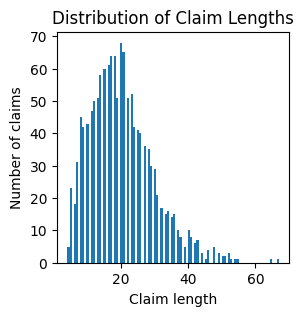

In [28]:
combined = {}

for claim_id, claim_content in train_data.items():
    combined[claim_id] = claim_content
for claim_id, claim_content in dev_data.items():
    combined[claim_id] = claim_content

claim_lens = []

for key in combined.keys():
    claim_lens.append(len(combined[key]['claim_text'].split()))

print(min(claim_lens), max(claim_lens), sum(claim_lens)/len(claim_lens))

plt.figure(figsize=(3,3))
plt.hist(claim_lens, bins=100)  # you can adjust the number of bins as needed
plt.xlabel('Claim length')
plt.ylabel('Number of claims')
plt.title('Distribution of Claim Lengths')
plt.show()

1 100 19.685495939452046


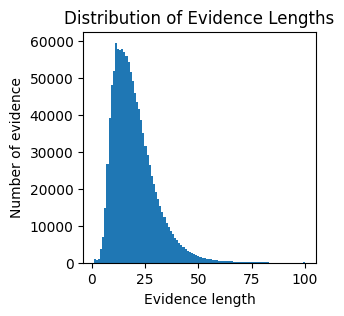

In [24]:
evi_lens = []

for key, value in evi_data.items():
    a_len = len(value.split())
    if a_len < 100:
        evi_lens.append(a_len)
    else:
        evi_lens.append(100)

print(min(evi_lens), max(evi_lens), sum(evi_lens)/len(evi_lens))

plt.figure(figsize=(3,3))
plt.hist(evi_lens, bins=100)  # you can adjust the number of bins as needed
plt.xlabel('Evidence length')
plt.ylabel('Number of evidence')
plt.title('Distribution of Evidence Lengths')
plt.show()

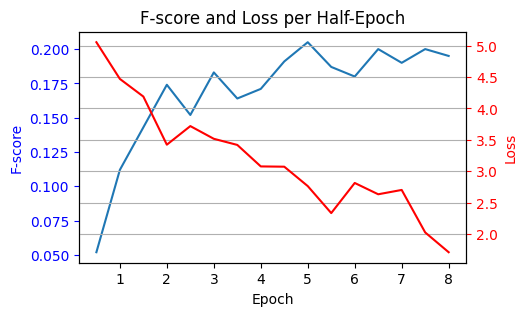

In [60]:
temp_f_score = f_score['bert']
temp_loss = loss['bert']
epochs = np.arange(0.5, len(f_score) * 0.5 + 0.5, 0.5)

# Create a new figure and a subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot F-score on the first y-axis
ax1.plot(epochs, f_score, label='F-score')
ax1.set_xticks(np.arange(1, len(f_score) // 2 + 1))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('F-score', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis and plot the loss on it
ax2 = ax1.twinx()
ax2.plot(epochs, loss, label='Loss', color='r')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')

# Title
plt.title('F-score and Loss per Half-Epoch')

plt.grid(True)
plt.show()

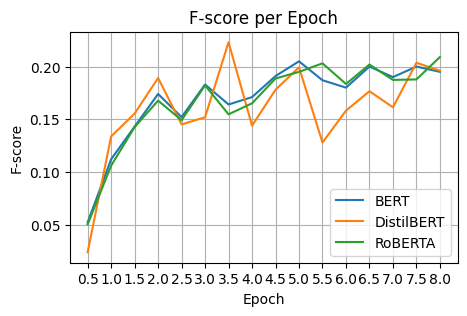

In [73]:
dis_f_score = f_score['distil_bert']
ori_f_score = f_score['bert']
rob_f_score = f_score['roberta']

# Create a new figure
plt.figure(figsize=(5, 3))

# Plot the F-score sequences
plt.plot(np.arange(0.5, len(ori_f_score) * 0.5 + 0.5, 0.5), ori_f_score, label='BERT')
plt.plot(np.arange(0.5, len(dis_f_score) * 0.5 + 0.5, 0.5), dis_f_score, label='DistilBERT')
plt.plot(np.arange(0.5, len(rob_f_score) * 0.5 + 0.5, 0.5), rob_f_score, label='RoBERTA')

# Set up the x-axis
plt.xticks(np.arange(0.5, len(dis_f_score) * 0.5 + 0.5, 0.5))

# Set up the labels and title
plt.xlabel('Epoch')
plt.ylabel('F-score')
plt.title('F-score per Epoch')

# Add a legend
plt.legend()

# Display the grid
plt.grid(True)

# Show the plot
plt.show()
